<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Sun May 12 18:29:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   50C    P0              40W / 125W |    800MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#Current_dir = os.getcwd()
#Current_dir

In [19]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [21]:
data_dir='data_medium'
os.listdir(data_dir)

['Ads', 'Sample_Images']

In [22]:
#os.listdir(os.path.join(data_dir,'Ads'))

In [23]:
imgTest= cv2.imread(os.path.join('data','Ads','converted_iframe_9_AD.jpg'))

In [24]:
type(imgTest)

NoneType

In [25]:
#imgTest.shape

In [26]:
#plt.imshow(imgTest)

In [27]:
#plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
#plt.show()

# Load Data

In [28]:
#tf.data.Dataset??

In [29]:
#tf.keras.utils.audio_dataset_from_directory??

In [30]:
data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(224,224))

Found 29687 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()


In [32]:
batch=data_iterator.next()


In [33]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [34]:
batch[0].shape # images are numpy arrays

(32, 224, 224, 3)

In [35]:
batch[1] # labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

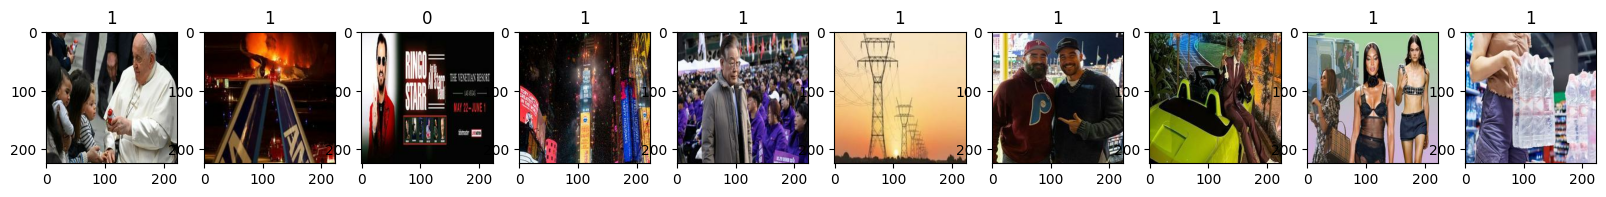

In [36]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [37]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [38]:
#batch[0] / 255

In [39]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [40]:
#scaled.as_numpy_iterator().next()

In [41]:
scaled_iterator=scaled.as_numpy_iterator()

In [42]:
batch = scaled_iterator.next()

In [43]:
batch[0].max()

1.0

In [44]:
#scaled.as_numpy_iterator().next()

# Split Data

In [45]:
#len(scaled)
len(data)

928

In [46]:
train_size = int(len(scaled)*.7)# batch size 32
val_size = int(len(scaled)*.2) #
test_size = int(len(scaled)*.1) #

In [47]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 649, Val Size:185, Test Size: 92


In [48]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [49]:
#train.as_numpy_iterator().next()[0]

In [50]:
#batch[0]

In [51]:
len(train)

649

## Pretrained Model ResNet50

In [79]:
import keras
from keras.models import load_model


The ResNEt50 model
https://datagen.tech/guides/computer-vision/resnet-50/#


In [80]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [81]:
conv_base.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

We will add a dense layer after our conv_base NN

In [82]:
from keras import models
from keras import layers

modelPreT = models.Sequential()
modelPreT.add(conv_base)

modelPreT.add(layers.Flatten())
modelPreT.add(layers.Dense(256, activation='relu'))
#modelPreT.add(layers.Dropout(0.5))
modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [83]:
modelPreT.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49,278,337
Trainable params: 49,225,217
Non-trainable params: 53,120
_________________________________________________________________


Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the ResNet50

In [84]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights before freezing the conv base: 216


In [85]:
conv_base.trainable = False

In [86]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [87]:
modelPreT.compile('Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])# Adagrad, adam

In [88]:
#train.as_numpy_iterator().next()[0]

In [89]:
histPreT = modelPreT.fit(train, epochs=60, validation_data=val) #  epochs 10 are over fitting. early stop at?

Epoch 1/60
649/649 [==============================] - 103s 152ms/step - loss: 0.5236 - accuracy: 0.7572 - val_loss: 0.4672 - val_accuracy: 0.7652
Epoch 2/60
649/649 [==============================] - 100s 154ms/step - loss: 0.4411 - accuracy: 0.8068 - val_loss: 0.4313 - val_accuracy: 0.7937
Epoch 3/60
649/649 [==============================] - 96s 148ms/step - loss: 0.4204 - accuracy: 0.8190 - val_loss: 0.4284 - val_accuracy: 0.7956
Epoch 4/60
649/649 [==============================] - 94s 144ms/step - loss: 0.4054 - accuracy: 0.8297 - val_loss: 0.4057 - val_accuracy: 0.8128
Epoch 5/60
649/649 [==============================] - 94s 144ms/step - loss: 0.3972 - accuracy: 0.8326 - val_loss: 0.3880 - val_accuracy: 0.8367
Epoch 6/60
649/649 [==============================] - 94s 144ms/step - loss: 0.3887 - accuracy: 0.8377 - val_loss: 0.3867 - val_accuracy: 0.8338
Epoch 7/60
649/649 [==============================] - 94s 144ms/step - loss: 0.3832 - accuracy: 0.8404 - val_loss: 0.3908 - val_

In [90]:
START_PLOT_FROM_EPOCH= 3

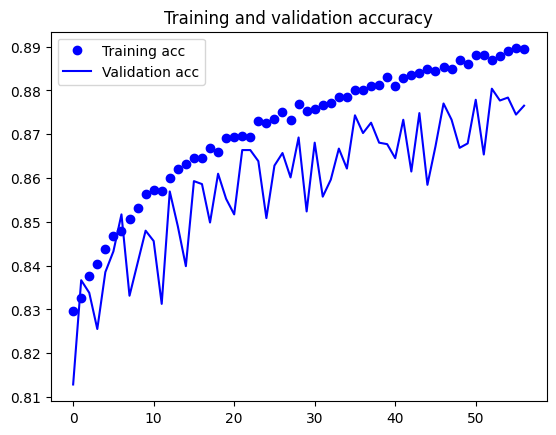

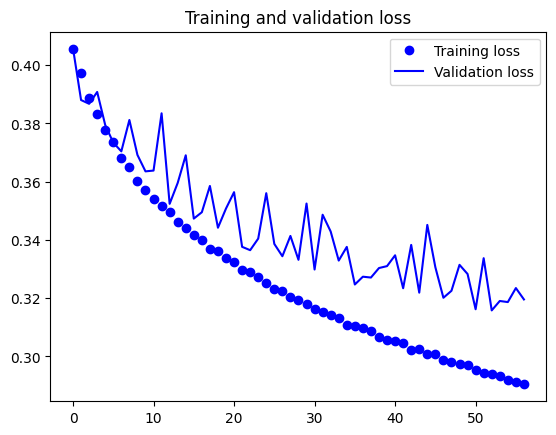

In [91]:
acc = histPreT.history['accuracy'][START_PLOT_FROM_EPOCH:]
val_acc = histPreT.history['val_accuracy'][START_PLOT_FROM_EPOCH:]
loss = histPreT.history['loss'][START_PLOT_FROM_EPOCH:]
val_loss = histPreT.history['val_loss'][START_PLOT_FROM_EPOCH:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [92]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [93]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [94]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhatPreT = modelPreT.predict(X)
    pre.update_state(y, yhatPreT)
    re.update_state(y, yhatPreT)
    acc.update_state(y, yhatPreT)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 1s 868ms/step
Precision: 0.7777777910232544, Recall:1.0, Accuracy: 0.8125
1/1 [==============================] - 0s 30ms/step
Precision: 0.843137264251709, Recall:0.914893627166748, Accuracy: 0.8125
1/1 [==============================] - 0s 30ms/step
Precision: 0.837837815284729, Recall:0.939393937587738, Accuracy: 0.8333333134651184
1/1 [==============================] - 0s 32ms/step
Precision: 0.8453608155250549, Recall:0.9213483333587646, Accuracy: 0.828125
1/1 [==============================] - 0s 31ms/step
Precision: 0.869918704032898, Recall:0.9304347634315491, Accuracy: 0.8500000238418579
1/1 [==============================] - 0s 31ms/step
Precision: 0.8657718300819397, Recall:0.9347826242446899, Accuracy: 0.8489583134651184
1/1 [==============================] - 0s 32ms/step
Precision: 0.884393036365509, Recall:0.9444444179534912, Accuracy: 0.8705357313156128
1/1 [==============================] - 0s 32ms/step
Precision: 0.8615384697914124

In [95]:
modelPreT.save(os.path.join('models','Pretrained_ResNet50_ad_class_medium30000.h5'))

# Test unseen inages

In [96]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [97]:
#os.chdir('..')
#os.chdir('Thesis')

In [98]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [99]:
#imgPre= cv2.imread(os.path.join('unseen data','folder_5_main_12.jpg')) #
imgPre= cv2.imread(os.path.join('unseen data','mcdonalds.jpeg')) #
#imgPre

In [100]:
import cv2

In [101]:
len(imgPre)

153

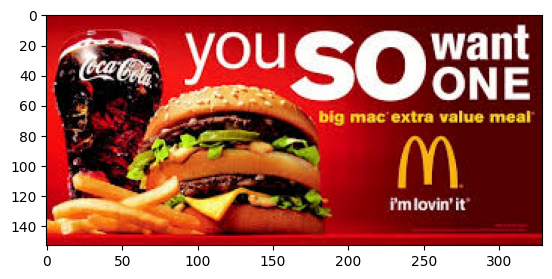

In [102]:
plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
#plt.show()

In [103]:
resizePreT = tf.image.resize(imgPre, (224,224))
#resizePreT

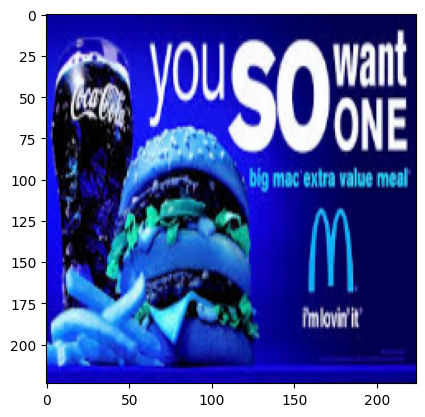

In [104]:
plt.imshow(resizePreT.numpy().astype(int))
plt.show()

In [105]:
#np.expand_dims(resizePreT,0).shape

In [106]:
yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_newPreT

1/1 [==============================] - 1s 1s/step


array([[0.7703725]], dtype=float32)

For the pretrained model the classes were inverted, so we have:

Simple Image = 1 <br>
Ad = 0

In [107]:
#class 1= simple img, class 0 = Ad

if yhat_newPreT > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Simple Image


Our Model

In [108]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [109]:
from keras.models import load_model

loaded_model = load_model(os.path.join('models',"ad_classifier_first_medium30000_Model.keras"))
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [110]:
yhat_loaded_model = loaded_model.predict(np.expand_dims(resizePreT/255, 0))#/ad_classifier_first_small_Model.keras
yhat_loaded_model

ValueError: in user code:

    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 224, 224, 3)


In [ ]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


Medium Model (30000 images)

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#loaded_model40 = load_model(os.path.join('data','models',"ad_classifier_medium.h5"))
loaded_model40 = load_model(os.path.join('models',"ad_classifier_medium.h5"))
loaded_model40.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [ ]:
yhat_loaded_model40 = loaded_model40.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_loaded_model40

1/1 [==============================] - 0s 104ms/step


array([[0.46027756]], dtype=float32)

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model40 > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad
